# 03 Random Networks

## Contents

01. [Introduction](#0301-Introduction)
02. [The Random Network Model](#0302-The-Random-Network-Model)
    * [Box 3-1 Defining Random Networks](#Box-3-1-Defining-Random-Networks)
    * [Box 3-2 Random Networks - a Brief History](#Box-3-2-Random-Networks---a-Brief-History)
03. [Number of Links](#0303-Number-of-Links)
    * [Box 3-3 Binomial Distribution - Mean and Variance](#Box-3-3-Binomial-Distribution---Mean-and-Variance)
04. [Degree Distribution](#0304-Degree-Distribution)

In [1]:
# import
import numpy as np
import scipy
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import IPython
import networkx as nx

from IPython.display import Image
%matplotlib inline

import datetime
dt = datetime.datetime.now()

# print('%s-%s-%s %s:%s:%s\n----------------------\n' 'numpy\t\t%s\n' 'scipy\t\t%s\n' 'pandas\t\t%s\n' 'matplotlib\t%s\n' '----------------------\n' 'ipython\t\t%s\n' '----------------------\n' 'sklearn\t\t%s\n' 'nltk\t\t%s\n' % 
#       (dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second, np.__version__, scipy.__version__, pd.__version__, matplotlib.__version__, IPython.__version__, sklearn.__version__, nltk.__version__))
print(
"""{}-{}-{} {}:{}:{}
----------------------
numpy\t\t{}
scipy\t\t{}
pandas\t\t{}
matplotlib\t{}
----------------------
ipython\t\t{}
----------------------
networkx\t{}""".format(dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second, np.__version__, scipy.__version__, pd.__version__, matplotlib.__version__, IPython.__version__, nx.__version__))

2019-3-18 17:9:42
----------------------
numpy		1.15.2
scipy		1.1.0
pandas		0.24.1
matplotlib	3.0.0
----------------------
ipython		7.2.0
----------------------
networkx	2.2


## 03.02 The Random Network Model

G(N,L)

<k>=2L/N=2.667


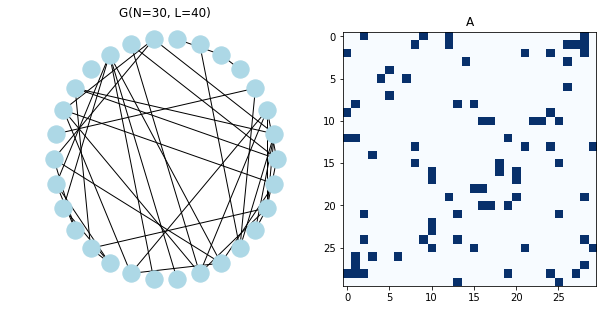

In [61]:
# num of edges
N = 30
# num of nodes
L = 40

seedN=123

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(10, 5))

G = nx.gnm_random_graph(N, L, seed=seedN)
nx.draw_circular(G, ax=axes[0], node_color='lightblue')

axes[0].set_title('G(N={}, L={})'.format(N, L))

A = nx.to_numpy_matrix(G)
axes[1].imshow(A, cmap='Blues')
axes[1].set_title('A')


print('<k>=2L/N={}'.format(np.round(2*L/N, 3)))

G(N,p)

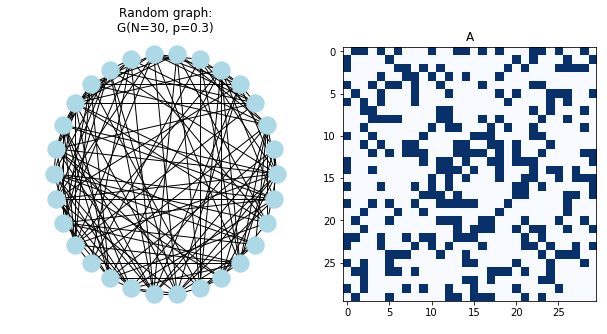

In [60]:
# num of edges
N = 30
# num of probability
p = .3
# seed
seedN=123

def random_graph(N, p, seedN):
    fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(10, 5))

    if 0 <= p and p <= 1:
        G = nx.gnp_random_graph(N, p, seed=seedN)
        nx.draw_circular(G, ax=axes[0], node_color='lightblue')
    
        axes[0].set_title('Random graph:\nG(N={}, p={})'.format(N, p))
    
        #A = nx.adjacency_matrix(G)
        A = nx.to_numpy_matrix(G)
        #print(mat)
        axes[1].imshow(A, cmap='Blues')
        axes[1].set_title('A')
    else:
        print('p must be [0,1]')

random_graph(N, p, seedN)

Erdős-Rényi network

Text(0.5, 1.0, 'A')

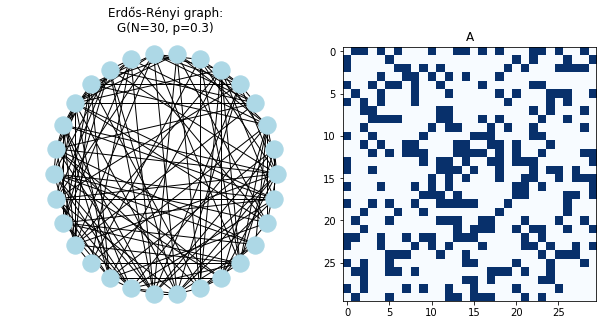

In [59]:
N = 30
p = .3
seedN = 123

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(10, 5))

G = nx.erdos_renyi_graph(N, p, seedN)
nx.draw_circular(G, ax=axes[0], node_color='lightblue')
axes[0].set_title('Erdős-Rényi graph:\nG(N={}, p={})'.format(N, p))

A = nx.to_numpy_matrix(G)
axes[1].imshow(A, cmap='Blues')
axes[1].set_title('A')

## 03.03 Number of Links

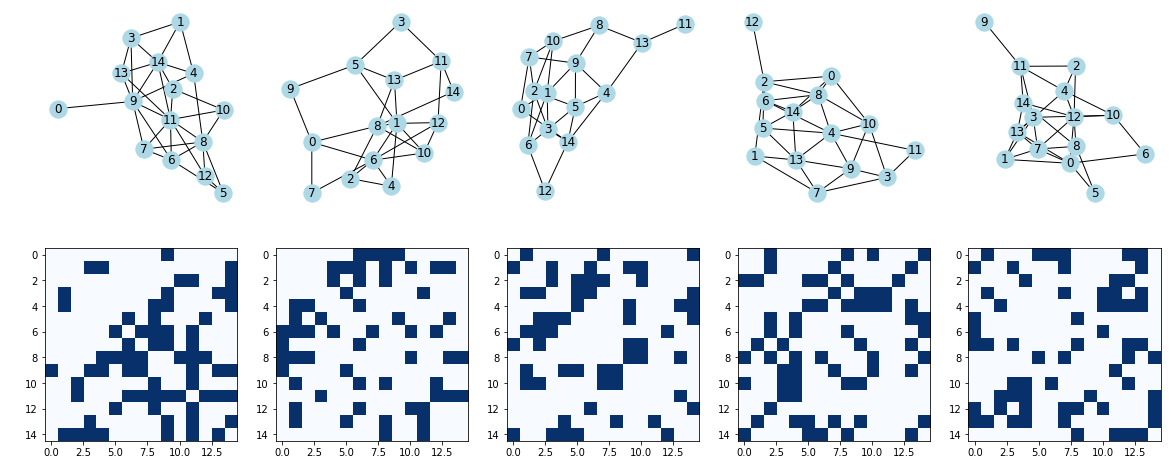

In [63]:
n = 15
p = .3

fig, axes = plt.subplots(ncols=5, nrows=2, figsize=(20, 8))
for i in range(5):
    G = nx.gnp_random_graph(n, p)
    nx.draw_networkx(G, ax=axes[0][i], node_color='lightblue')
    #ax.set_title('G(10, {})'.format(np.round(p, 3)))
    axes[0][i].set_axis_off()
    #nx.draw(G, node_size=80)
    
    A = nx.to_numpy_matrix(G)
    axes[1][i].imshow(A, cmap='Blues')

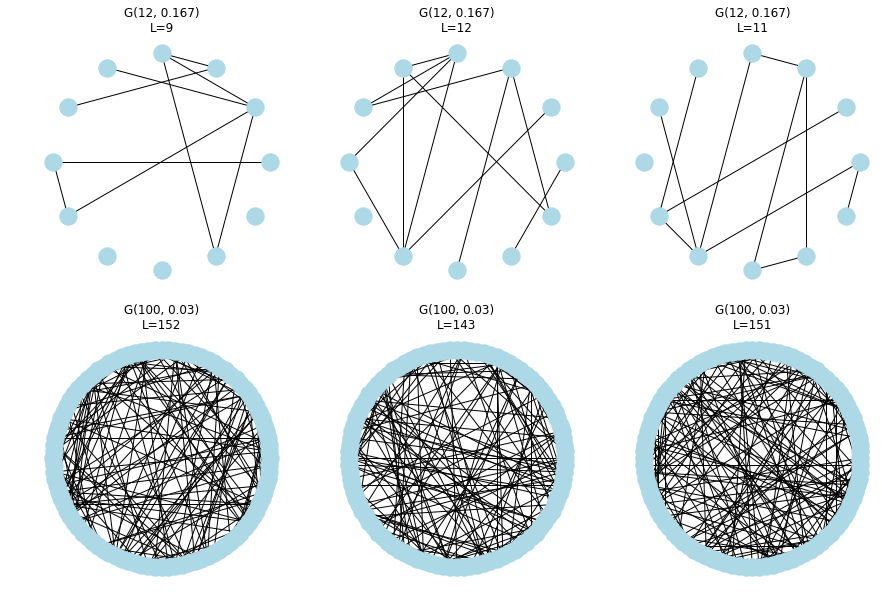

In [72]:
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(15, 10))

for i in range(3):
    N = 12
    p = 1/6
    G0 = nx.gnp_random_graph(N, p)
    nx.draw_circular(G0, ax=axes[0][i], node_color='lightblue')
    L = nx.number_of_edges(G0)
    axes[0][i].set_title('G({}, {})\nL={}'.format(N, np.round(p,3), L))
    axes[0][i].set_axis_off()
    
    N = 100
    p = .03
    G1 = nx.gnp_random_graph(N, p)
    nx.draw_circular(G1, ax=axes[1][i], node_color='lightblue')
    L = nx.number_of_edges(G1)
    axes[1][i].set_title('G({}, {})\nL={}'.format(N, np.round(p,3), L))
    axes[1][i].set_axis_off()

## 03.04 Degree Distribution

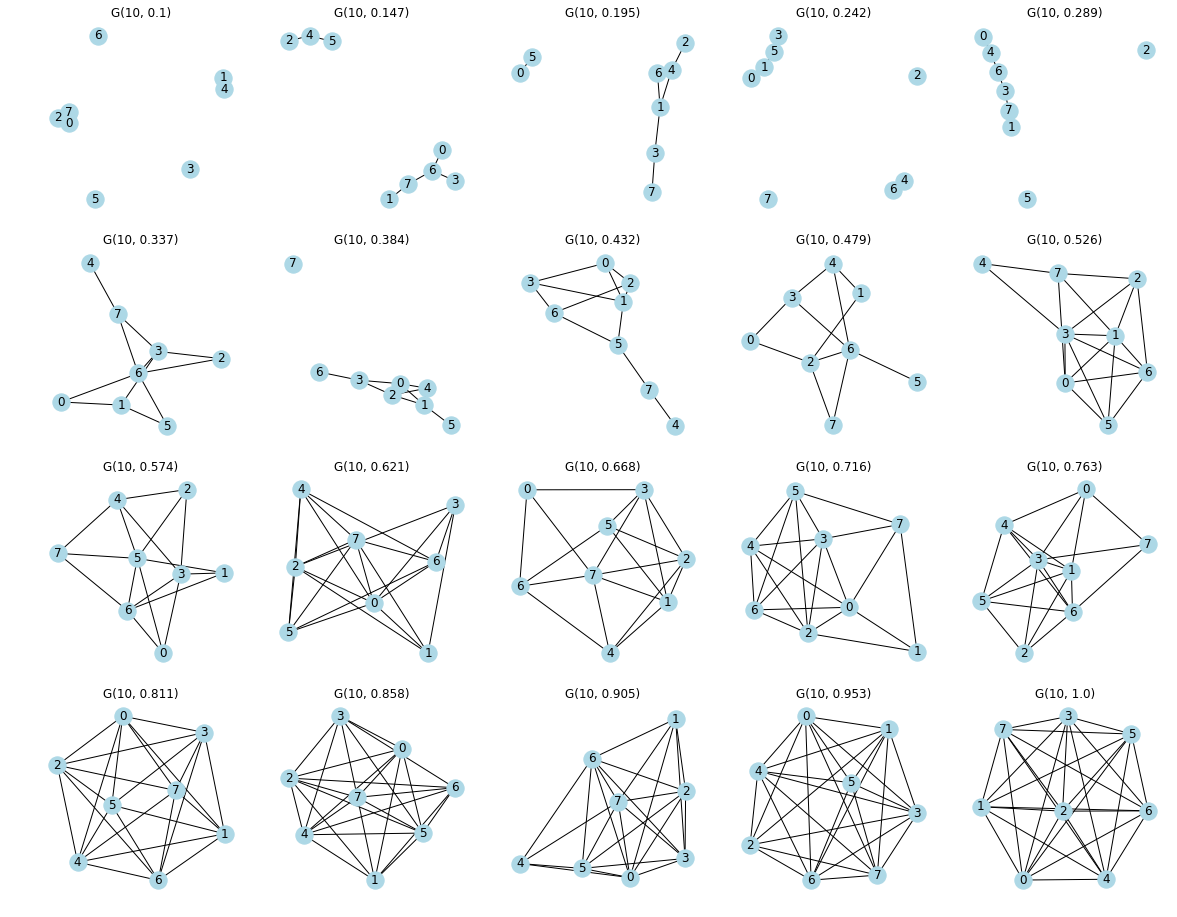

In [50]:
n = 8
ps = np.linspace(0.1, 1, 20)

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16))
for ax, p in zip(axes.ravel(), ps):
    G = nx.gnp_random_graph(n, p)
    nx.draw_networkx(G, ax=ax, node_color='lightblue')
    ax.set_title('G(10, {})'.format(np.round(p, 3)))
    ax.set_axis_off()
    #nx.draw(G, node_size=80)

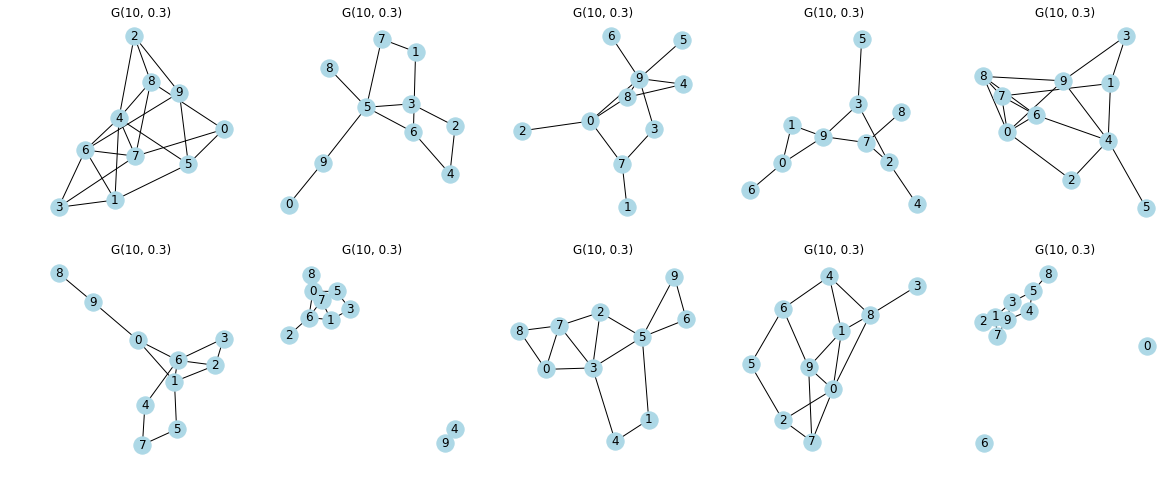

In [48]:
n = 10
p = 0.3

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))
for ax in axes.ravel():
    nx.draw_networkx(nx.gnp_random_graph(n, p), ax=ax, node_color='lightblue')
    ax.set_title('G(10, {})'.format(np.round(p, 3)))
    ax.set_axis_off()
    #nx.draw(G, node_size=80)

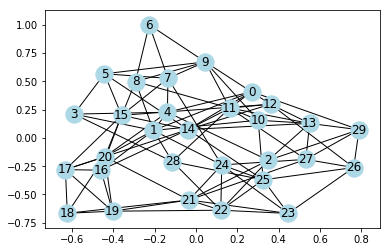

In [57]:
n = 30
k = 7
p = 0.3

G = nx.watts_strogatz_graph(n, k, p)
nx.draw_networkx(G, node_color='lightblue')


In [ ]:
k = 10

def p_k(k):
    